In [1]:
import cv2
from matplotlib import pyplot as plt
import pytesseract

In [2]:
image = cv2.imread('data/image-3.jpeg',cv2.IMREAD_UNCHANGED)

In [3]:
def gray_scale_image(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )

In [4]:
def gaussian_blur(gray): 
    return cv2.GaussianBlur(gray,(7,7),0)

In [5]:
# Otsu's thresholding after Gaussian filtering
def thresh_image(blur):
    return cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [6]:
#karnel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
def dialate_image(thres):
    return cv2.dilate(thres,cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)),iterations = 1)

In [7]:
def plot_two_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    ax2= fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

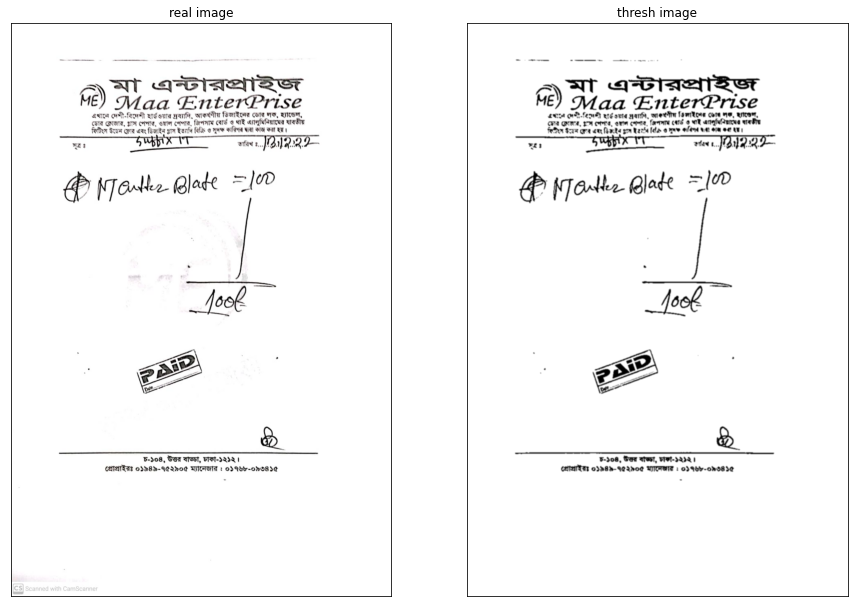

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = 255 - cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# Blur and perform text extraction(you can use raw image)
thresh = cv2.GaussianBlur(thresh, (5,5), 0)
# thresh = cv2.medianBlur(thresh,3)
plot_two_images(image, thresh, "real image", "thresh image")

In [9]:
# gray_img = gray_scale_image(image)
# gaussian_img = gaussian_blur(gray_img)
# thres_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
# dia_img = dialate_image(thres_img)
# cnts = cv2.findContours(dia_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts =cnts[0] if len(cnts) == 2 else cnts[1]
# cnts = sorted(cnts,key=lambda x: cv2.boundingRect(x)[1])
# i=0
# for cnt in cnts:
#     x,y,w,h = cv2.boundingRect(cnt)
# #     if w>100: # w>50 and
#     roi = thresh[y:y+h, x:x+w]
#     cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
#     ocr_result = pytesseract.image_to_string(roi)
#     print('extract ',i,' : ',ocr_result)
#     i +=1
# cv2.imshow('After countour image',image)
# cv2.waitKey(0)

In [10]:
for j in range(3):
    gray_img = gray_scale_image(image)
    gaussian_img = gaussian_blur(gray_img)
    thres_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    dia_img = dialate_image(thres_img)
    cnts = cv2.findContours(dia_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts =cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts,key=lambda x: cv2.boundingRect(x)[1])
    i=0
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        if w>50: # w>50 and
            roi = thresh[y:y+h, x:x+w]
            cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
            #print('j :',j)
            if j==1:
                ocr_result = pytesseract.image_to_string(roi, lang='ben+eng', config='--psm 6')
                print('extract ',i,' : ',ocr_result)
            i +=1

extract  0  :  
extract  1  :  
extract  2  :  
extract  3  :  @ মা এল্টারমস্রাইুজ্
ME) Maa EnterPrise
এছানে দেশটি বিপেশী হার্ড ওয়ার প্লধাাপি, আকর্ষণীয় ডিলাইপের ডোৎ লক, ছ্যাক্ডেল,
ফোর ফ্লোর, চপ পেপার, ওয়াল পেপার, জিপগাম বোর ও খাই এযাপুমিবিয়াখের ঘাবত়ীয়
ফিটীস উড়েন ফ্লোর এছং বিজযইব চ্রাস ইহ [বি ও দুখক্ষ কবিপৰ রা কাজ করা ₹য়।
2y /__I;‘EEB"(K‘ ডাবিখ e তালা

extract  4  :  রবী

extract  5  :  (0144

extract  6  :  
extract  7  :  রা

extract  8  :  2552

extract  9  :  চ-১০৪, উত্তর বাঙ্ডা, চাকা-১২১২।
প্রোপ্রাইরঃ ০১৯৪৯-৭৫২৯০৫ ম্যানেজার : ০১৭৬৮-০৯৩৪১৫



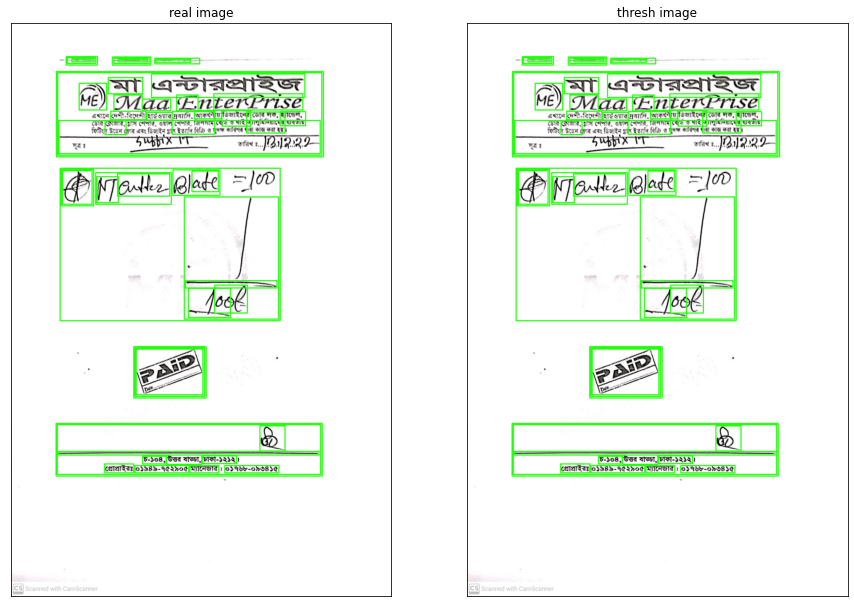

In [11]:
plot_two_images(image, image, "real image", "thresh image")